#### Jueves 8 de mayo de 2025

## Árbol de Decisión CART. ¿Ganará el partido?

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
#Dataset
data = {
    'Partido': [1, 2, 3],
    'Local': ['Sí', 'No', 'Sí'],
    'RivalFuerte': ['No', 'Sí', 'Sí'],
    'JugadorEstrella': ['Sí', 'No', 'Sí'],
    'Ganó': ['Sí', 'No', 'Sí']
}

df = pd.DataFrame(data)
print("Dataset original: ")
print(df)

Dataset original: 


,Partido,Local,RivalFuerte,JugadorEstrella,Ganó
0,1,Sí,No,Sí,Sí
1,2,No,Sí,No,No
2,3,Sí,Sí,Sí,Sí


In [4]:
# Cambiar datos categóricos a numéricos
label_encoders =  {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le
print("\nDataset codificado:")
df_encoded


Dataset codificado:


,Partido,Local,RivalFuerte,JugadorEstrella,Ganó
0,0,1,0,1,1
1,1,0,1,0,0
2,2,1,1,1,1


In [6]:
#Dividir datos de entrenamiento y prueba
X = df_encoded.drop(['Partido', 'Ganó'], axis=1)
y = df_encoded['Ganó']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print("\nDatos de entrenamiento: \n")
print(X_train)
print("\nDatos de prueba: \n")
print(X_test)


Datos de entrenamiento: 

   Local  RivalFuerte  JugadorEstrella
2      1            1                1

Datos de prueba: 

   Local  RivalFuerte  JugadorEstrella
0      1            0                1
1      0            1                0


In [7]:
# Creación y Entrenamiento del modelo
modelo = DecisionTreeClassifier(
    criterion = 'gini',
    random_state = 42
)
modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())


Profundidad real del árbol: 1
Número de hojas: 2


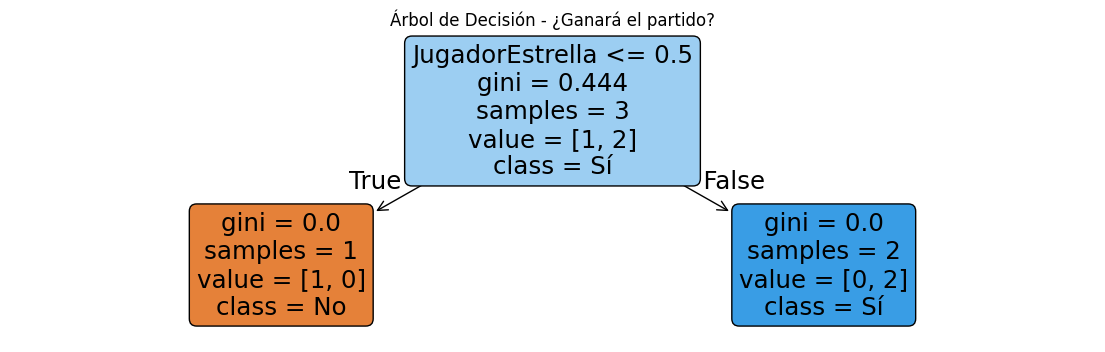

In [8]:
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names=['No', 'Sí'], 
    filled=True,
    rounded=True,
    impurity=True
)
plt.title("Árbol de Decisión - ¿Ganará el partido?")
plt.show()

In [23]:
# Hacer predicciones

# Local: 1=Sí 0=No
# RivalFuerte: 1=Sí 0=No
# JugadorEstrella: 1=Sí 0=No

print("PREDICCIÓN - ¿GANARÁ EL PARTIDO? \n")

# Ejemplo de predicción para Shrek
nuevos_datos = {
    'Local': 1,
    'RivalFuerte': 0,
    'JugadorEstrella': 1
}

nuevo_df = pd.DataFrame([nuevos_datos])
print("Datos de predicción: \n")
for atributo, valor in nuevos_datos.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo dato:")
if prediccion[0] == 1:
    print("El equipo ganará el partido")
else:
    print("El equipo no ganará el partido")

PREDICCIÓN - ¿GANARÁ EL PARTIDO? 

Datos de predicción: 

Local: 1
RivalFuerte: 0
JugadorEstrella: 1

Predicción para el nuevo dato:
El equipo ganará el partido


In [12]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Local -> 0.0
RivalFuerte -> 0.0
JugadorEstrella -> 1.0


#### ¿Cuál es el Gini para "Local = Sí"? , Si "RivalFuerte = Sí", ¿qué predice el árbol?

In [24]:
# Gini para Local = Sí

# Filtrar las filas donde 'Local' = 'Sí'
local_si = df[df['Local'] == 'Sí']

# Contar la frecuencia de cada clase en 'Ganó' y calcular la proporción manualmente
conteos = local_si['Ganó'].value_counts()
total = len(local_si)
proporciones = conteos / total

# Calcular el Gini: 1 - sum(p_i^2)
gini_local_si = 1 - sum(proporciones**2)

print(f"Gini para 'Local = Sí': {gini_local_si}")

# Si "RivalFuerte = Sí", ¿qué predice el árbol?:
# En el árbol de decisión, **"RivalFuerte"** se usa para predecir si el equipo ganará, 
# dependiendo de si el rival es fuerte o no.


Gini para 'Local = Sí': 0.0
